
## Data Science Salaries 2023

Este conjunto de datos es útil para entender la distribución de los salarios en el campo de la ciencia de datos y cómo estos pueden variar en función de factores como la ubicación del empleado y del empleador, el nivel de experiencia, el tipo de empleo, entre otros. Nos permite explorar el impacto del trabajo remoto en los salarios de ciencia de datos y empezar a sacar nuestras propias conclusiones.

##### VARIABLES
<table>
  <tr>
    <th>Nombre de la columna</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>work_year</td>
    <td>El año en que se pagó el salario.</td>
  </tr>
  <tr>
    <td>experience_level</td>
    <td>El nivel de experiencia en el trabajo durante el año.</td>
  </tr>
  <tr>
    <td>employment_type</td>
    <td>El tipo de empleo para el rol.</td>
  </tr>
  <tr>
    <td>job_title</td>
    <td>El rol desempeñado durante el año.</td>
  </tr>
  <tr>
    <td>salary</td>
    <td>El total bruto del salario pagado.</td>
  </tr>
  <tr>
    <td>salary_currency</td>
    <td>La moneda del salario pagado como código de moneda ISO 4217.</td>
  </tr>
  <tr>
    <td>salaryinusd</td>
    <td>El salario en dólares estadounidenses (USD).</td>
  </tr>
  <tr>
    <td>employee_residence</td>
    <td>El principal país de residencia del empleado durante el año de trabajo como código de país ISO 3166.</td>
  </tr>
  <tr>
    <td>remote_ratio</td>
    <td>La cantidad total de trabajo realizado a distancia.</td>
  </tr>
  <tr>
    <td>company_location</td>
    <td>El país de la oficina principal del empleador o la sucursal contratante.</td>
  </tr>
  <tr>
    <td>company_size</td>
    <td>El número mediano de personas que trabajaron para la empresa durante el año.</td>
  </tr>
</table>


#### Objetivos:

El objetivo principal de este ejercicio es aprender y aplicar técnicas de análisis y visualización de datos utilizando las bibliotecas de Python Matplotlib, Seaborn y Plotly.

Los pasos adecuados para completarlo son:

- Explorar el conjunto de datos: Comprender la estructura del conjunto de datos, los tipos de variables presentes y cómo estas están distribuidas. Limpiar y preparar el conjunto de datos: Manipular los datos para que sean más accesibles y útiles para el análisis. Esto puede incluir tratar con valores faltantes, convertir tipos de datos y generar nuevas variables a partir de las existentes.

- Analizar el conjunto de datos: Extraer información útil y significativa del conjunto de datos a través de diversas técnicas de análisis de datos. Visualizar los datos: Crear gráficos y diagramas que ayuden a entender y comunicar los patrones y las relaciones presentes en los datos.

Para responder a las preguntas planteadas se deben usar las siguientes bibliotecas :

- Usar Matplotlib para crear gráficos básicos como gráficos de barras, de líneas y de dispersión.
- Usar Seaborn para crear gráficos más complejos y atractivos visualmente, aprovechando sus capacidades de integración con pandas.





### Primer paso, la carga de datos, limpieza, exploración y primera comprensión de nuestro dataset¶


In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly

#### Importamos librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#### Cargamos nuestro dataset

In [27]:
df = pd.read_csv('dataset\ds_salaries.csv') #Aquí se debe poner la ruta donde está guardado el archivo csv

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


#### ¿Cuántas entradas (filas) y variables (columnas) tiene el conjunto de datos?

In [10]:
df.shape

(3755, 11)

#### ¿Qué tipos de datos contiene cada columna?

In [13]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

#### ¿Existen valores faltantes en el conjunto de datos?

In [16]:
df.isnull().sum().sum()

0

#### ¿Cúal es la distribución que presentan las variables de nuestro dataset?

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


#### Crea una gráfica para visualizar nuestras variables numéricas:

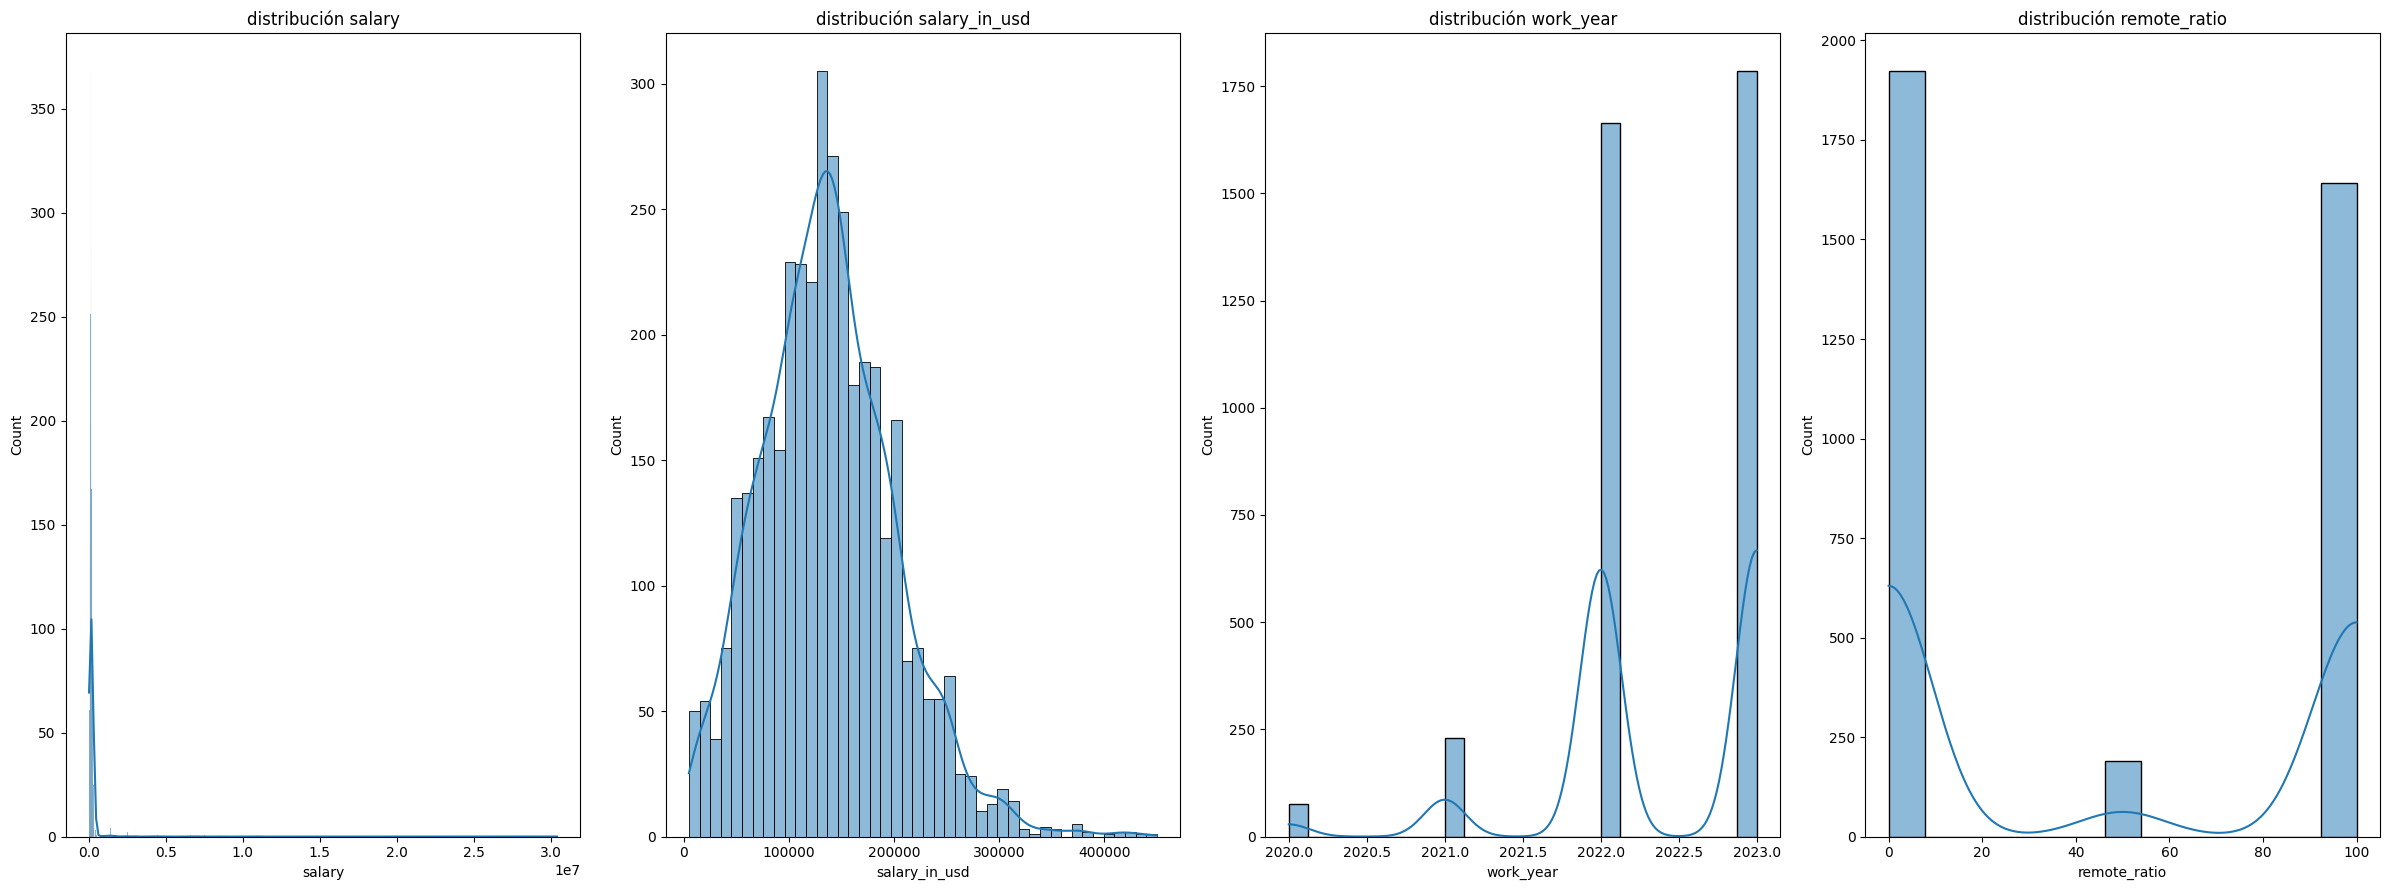

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24,9))
cols = ['salary', 'salary_in_usd', 'work_year', 'remote_ratio']

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"distribución {col}")

plt.tight_layout()
plt.show()

#### Crea una gráfica para visualizar nuestras variables categóricas:

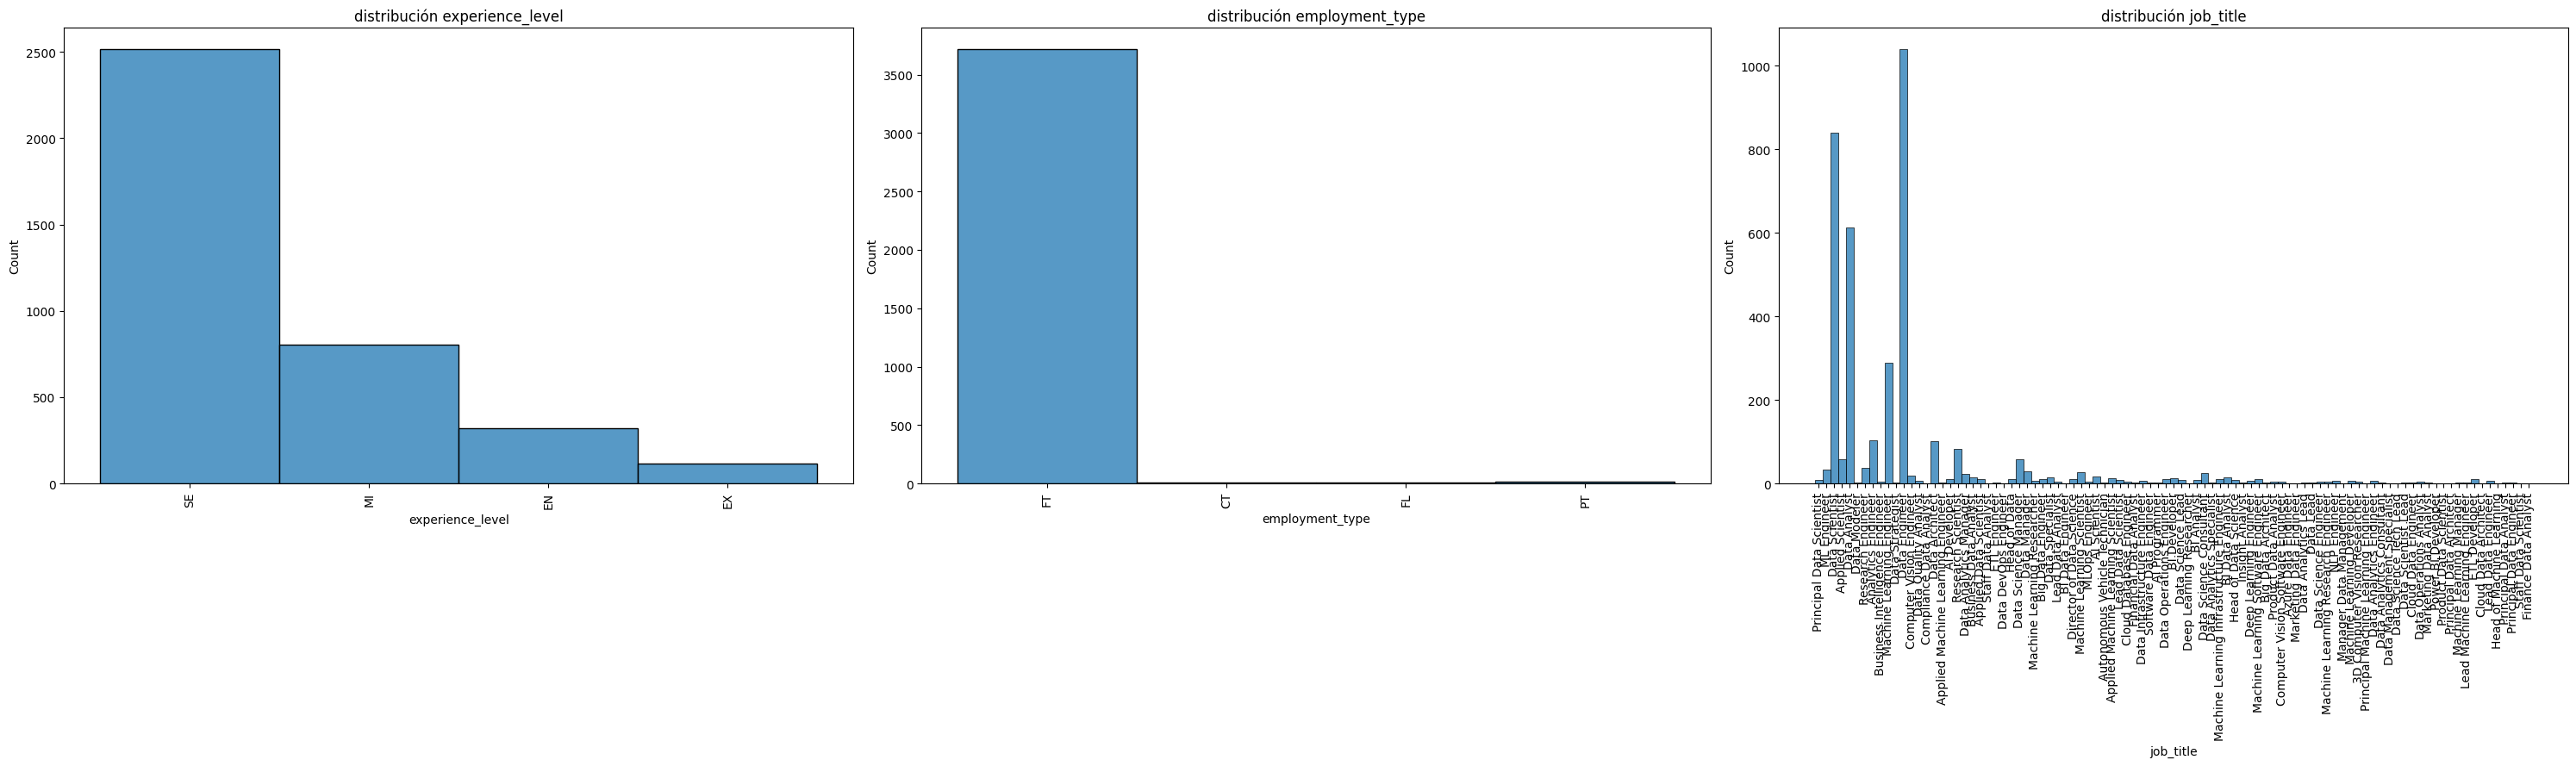

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,9))
cols = ['experience_level', 'employment_type', 'job_title']

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"distribución {col}")
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

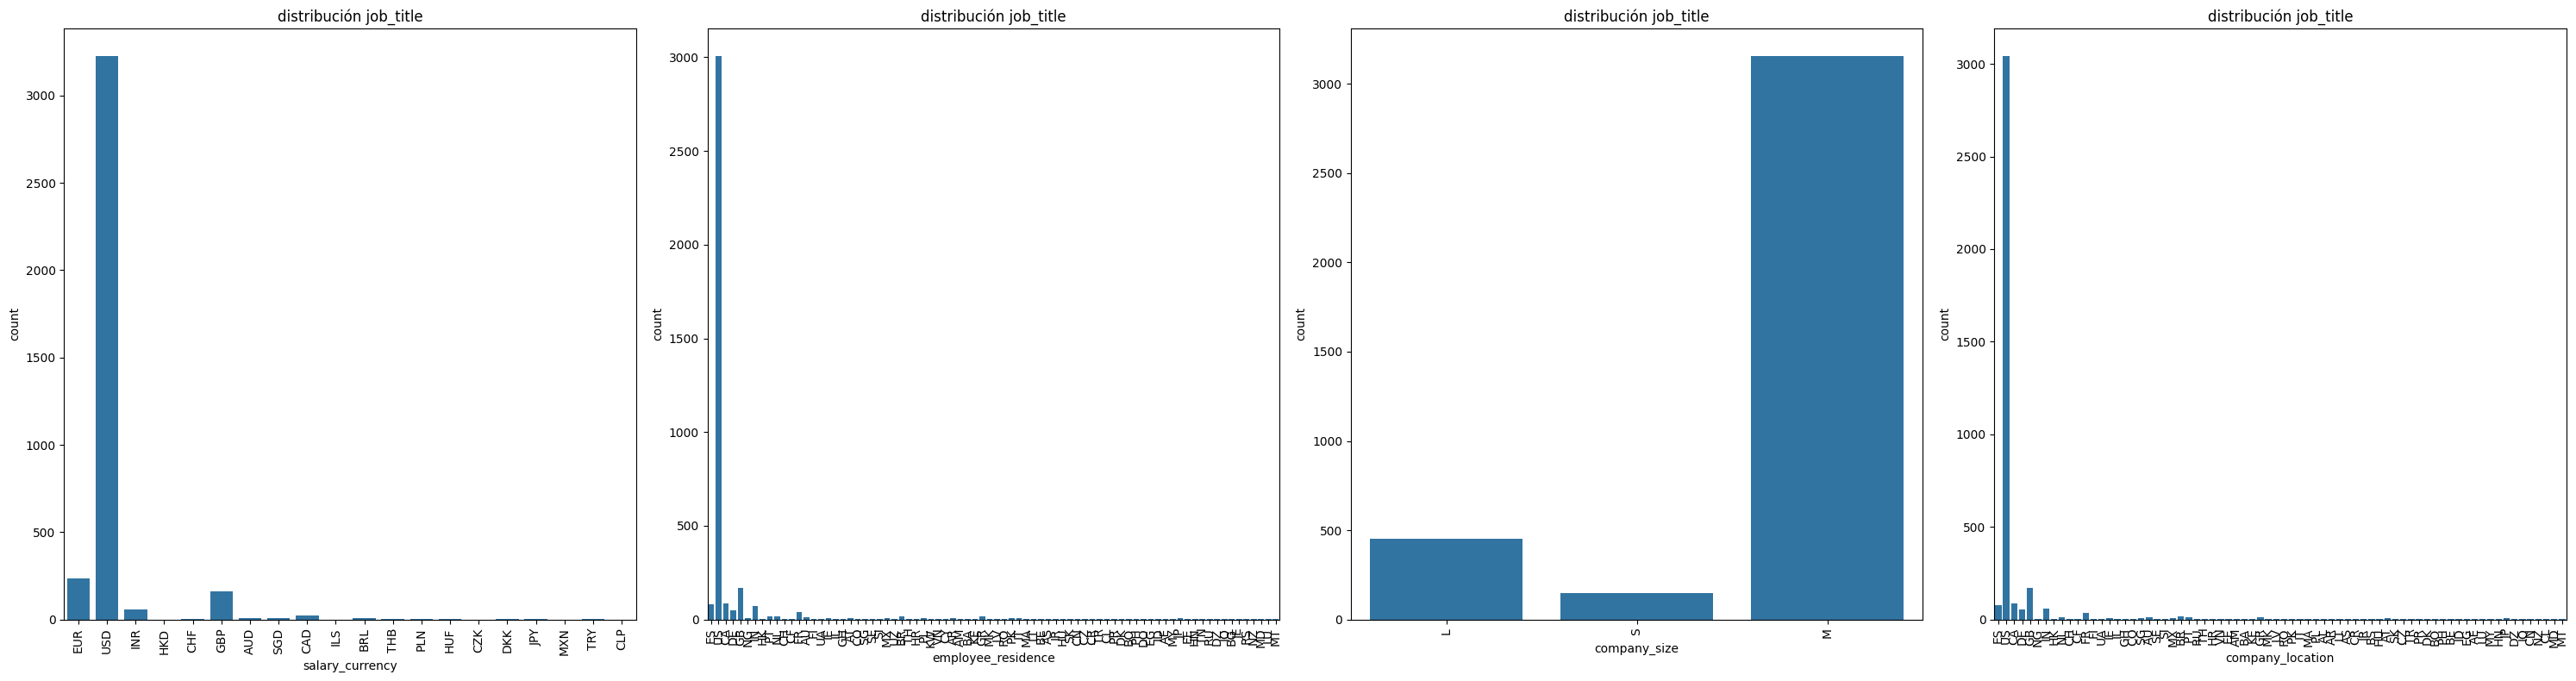

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 8))
cols = ['salary_currency', 'employee_residence', 'company_size', 'company_location']

for i, column in enumerate(cols):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"distribución {col}")
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

#### Identifica los outliers de nuestro dataset de forma gráfica: 

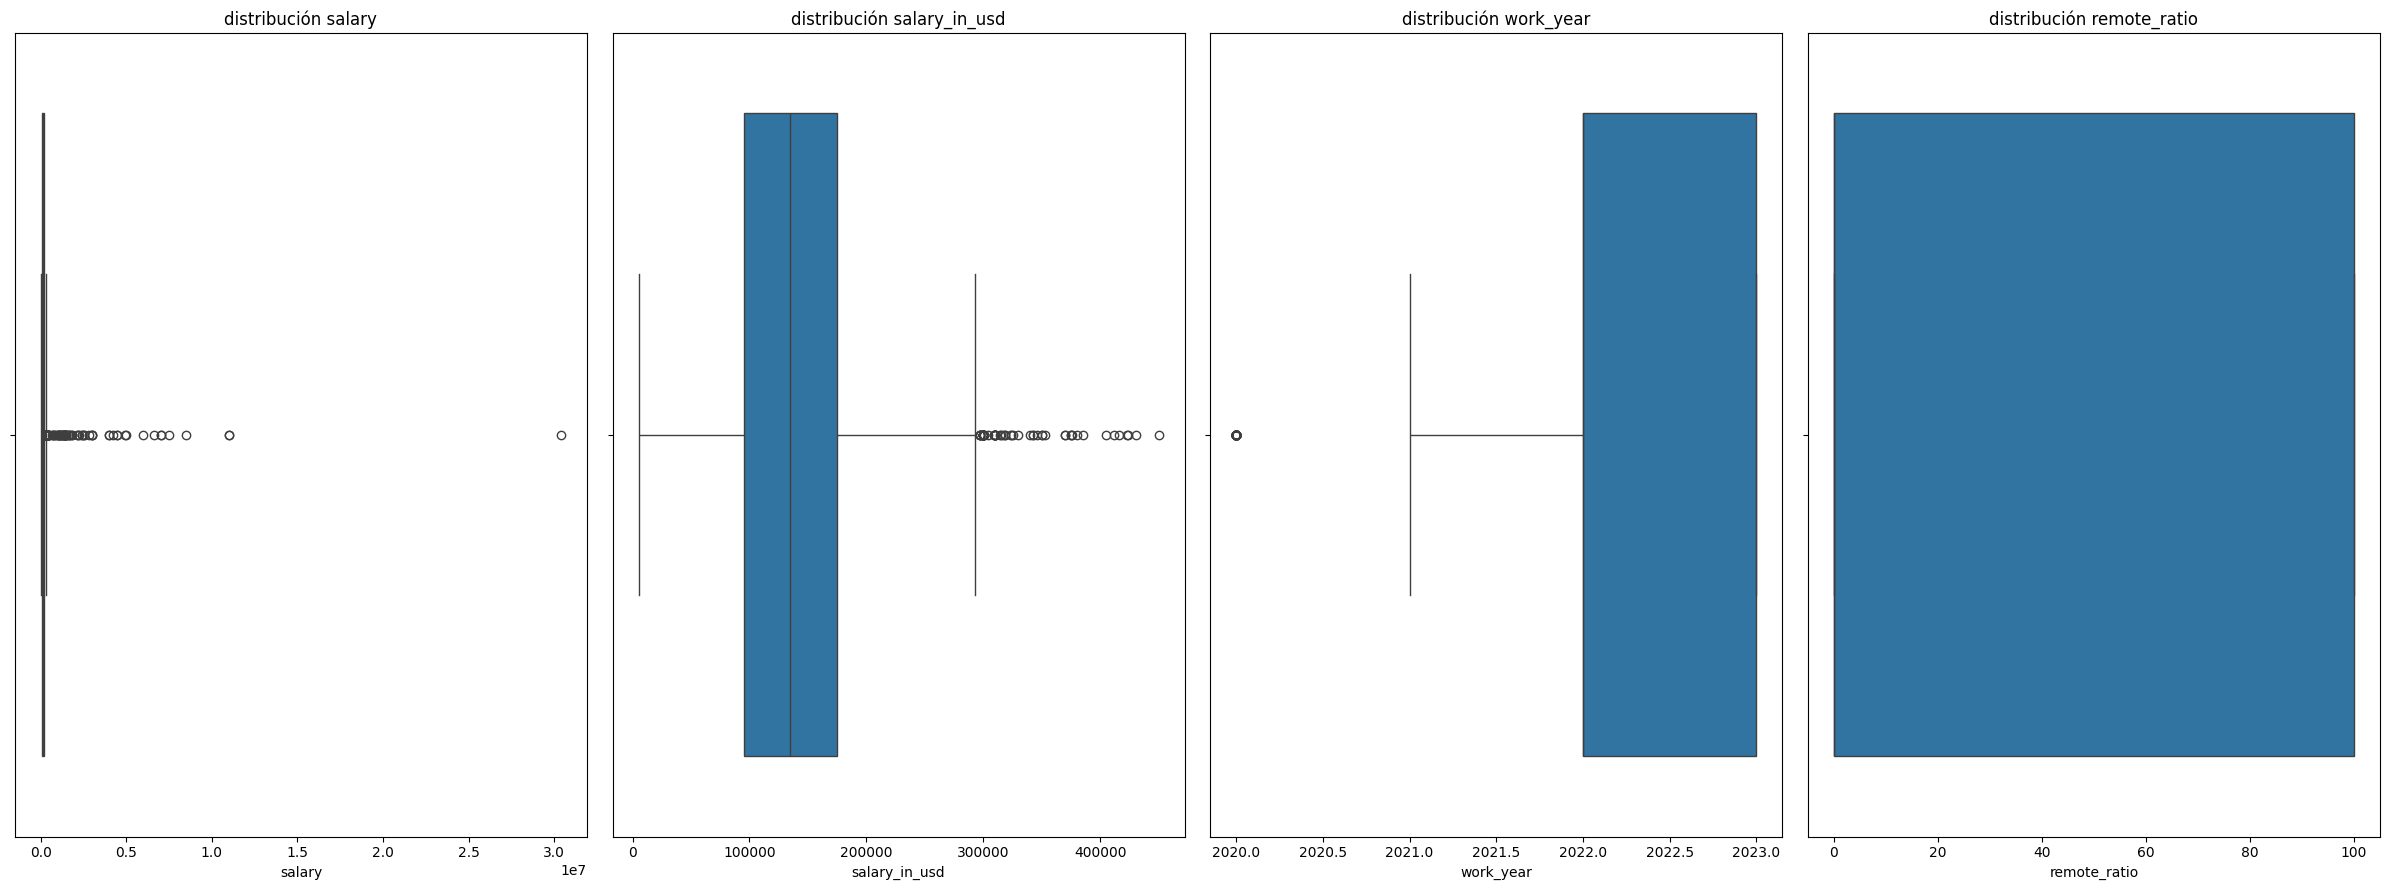

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24,9))
cols = ['salary', 'salary_in_usd', 'work_year', 'remote_ratio']

for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"distribución {col}")

plt.tight_layout()
plt.show()

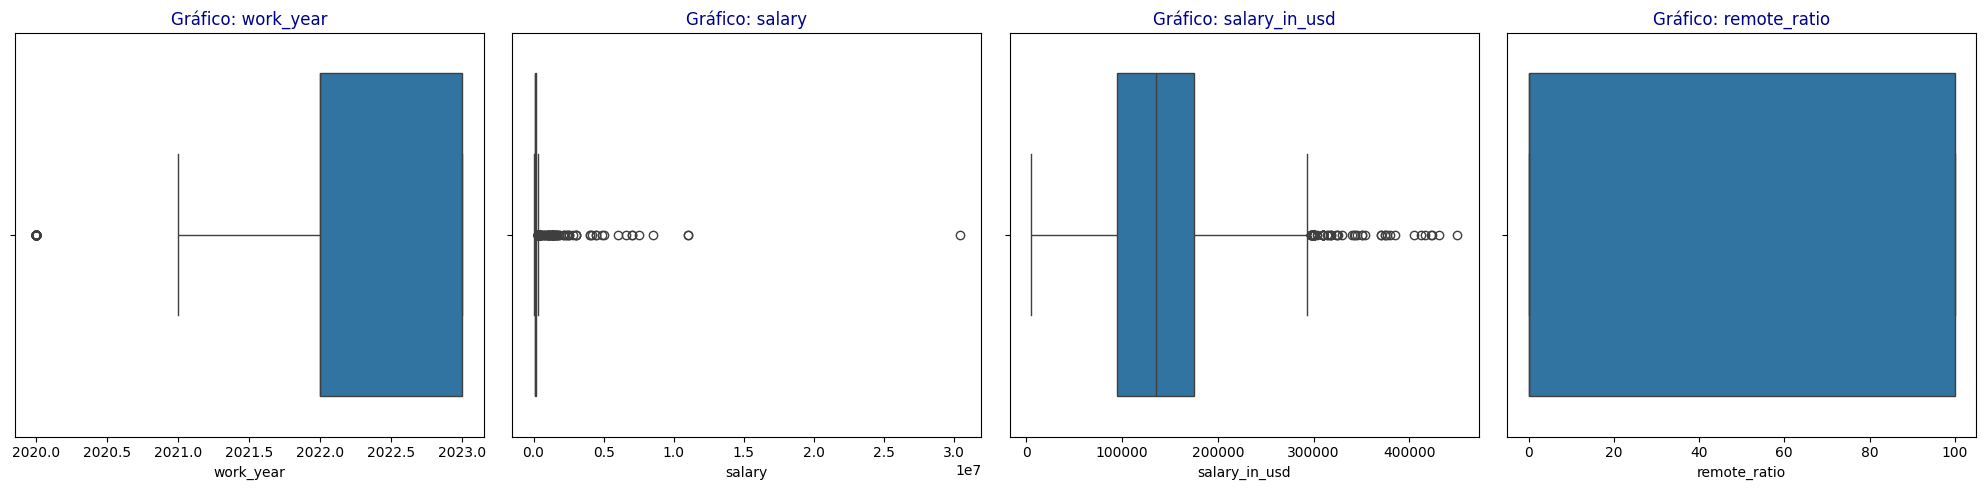

In [46]:
import math
def identificar_outliers(dataframe):
    """
    Esta función crea un gráfico de caja (boxplot) para cada columna numérica 
    en un DataFrame para ayudar a identificar los outliers.
    """
    # Seleccionamos solo las columnas numéricas
    numeric_cols = dataframe.select_dtypes(include=np.number).columns

    # Creamos los subplots
    ncols = 4
    nrows = math.ceil(len(numeric_cols) / ncols) 
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows))

    # Si el dataframe tiene menos de 4 columnas numéricas, axes no será una lista de listas, por lo que se convierte en una para poder iterar
    if nrows == 1 or ncols == 1:
        axes = [axes]

    for i, col in enumerate(numeric_cols):
        row = i // ncols
        col_idx = i % ncols
        # Comprueba si la columna tiene más de un valor único para evitar errores
        if len(dataframe[col].unique()) > 1:
            sns.boxplot(x=dataframe[col], data=dataframe, ax=axes[row][col_idx])
            axes[row][col_idx].set_title(f"Gráfico: {col}", color="DarkBlue")
        else:
            print(f"La columna {col} tiene un solo valor único y no se puede graficar")

    plt.tight_layout()
    plt.show()

identificar_outliers(df)

### Segundo paso, la visualización y el análisis de datos de forma gráfica y atractiva:

#### ¿Cuál es el salario promedio por nivel de experiencia?

In [113]:
df['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

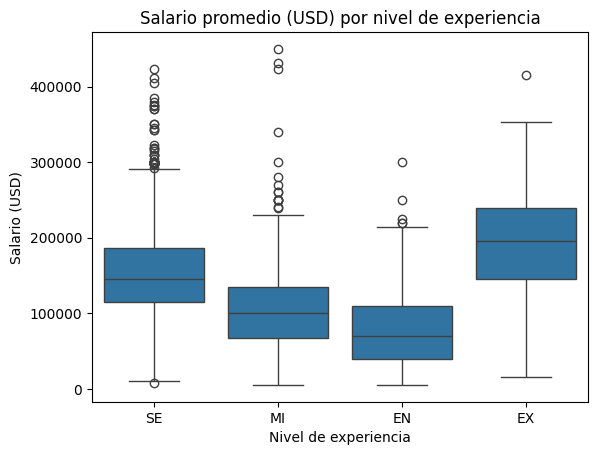

In [78]:
fig = sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
fig.set_title('Salario promedio (USD) por nivel de experiencia')
fig.set_ylabel('Salario (USD)')
fig.set_xlabel('Nivel de experiencia')
plt.show()


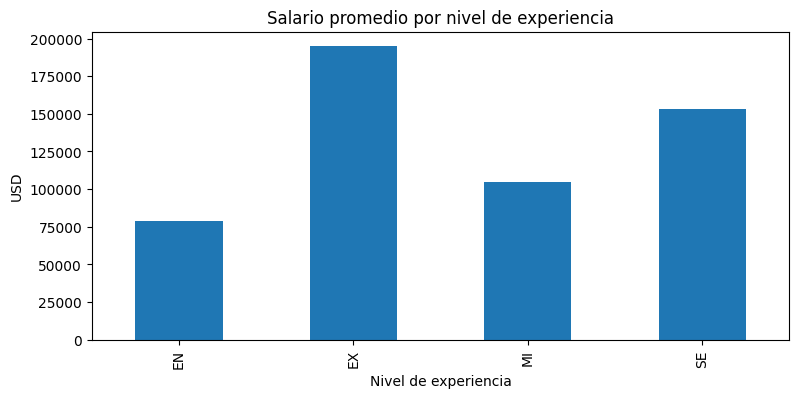

In [96]:
med_salario = df.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize=(9,4))
med_salario.plot(kind='bar',ylabel='USD',xlabel='Nivel de experiencia', title='Salario promedio por nivel de experiencia')
plt.show()


#### ¿Cómo ha cambiado el salario medio con el paso del tiempo (work_year)?

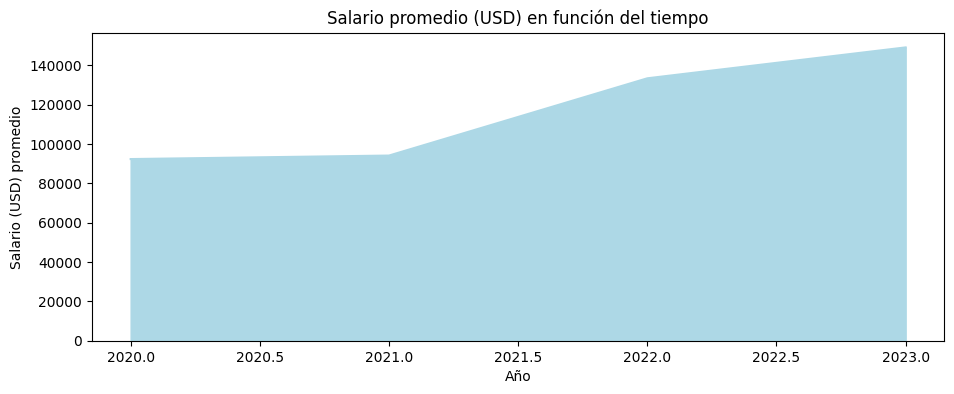

In [111]:
salario_tiempo = df.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(11,4))
salario_tiempo.plot(kind='area', ylabel='Salario (USD) promedio',xlabel='Año', title='Salario promedio (USD) en función del tiempo', color='#add8e6')
plt.show()

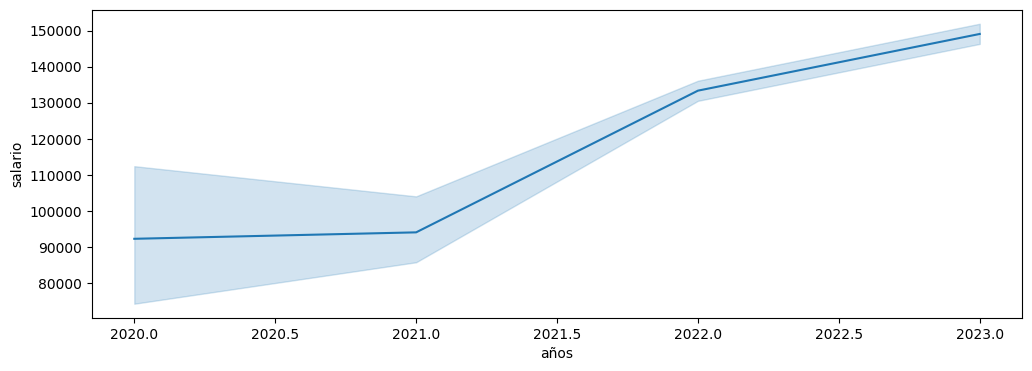

In [104]:
plt.figure(figsize=(12, 4))
salary_order = sns.lineplot(x=df["work_year"] , y= df["salary_in_usd"]) 
salary_order.set_xlabel("años")
salary_order.set_ylabel("salario")
plt.show()

#### ¿Cuál es la proporción de trabajo remoto entre diferentes roles de trabajo?

C:\Users\danyr\AppData\Local\Temp\ipykernel_12596\3111435632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = proporcion_remoto_trabajo, x = 'remote_ratio', y= 'job_title', palette= 'mako')


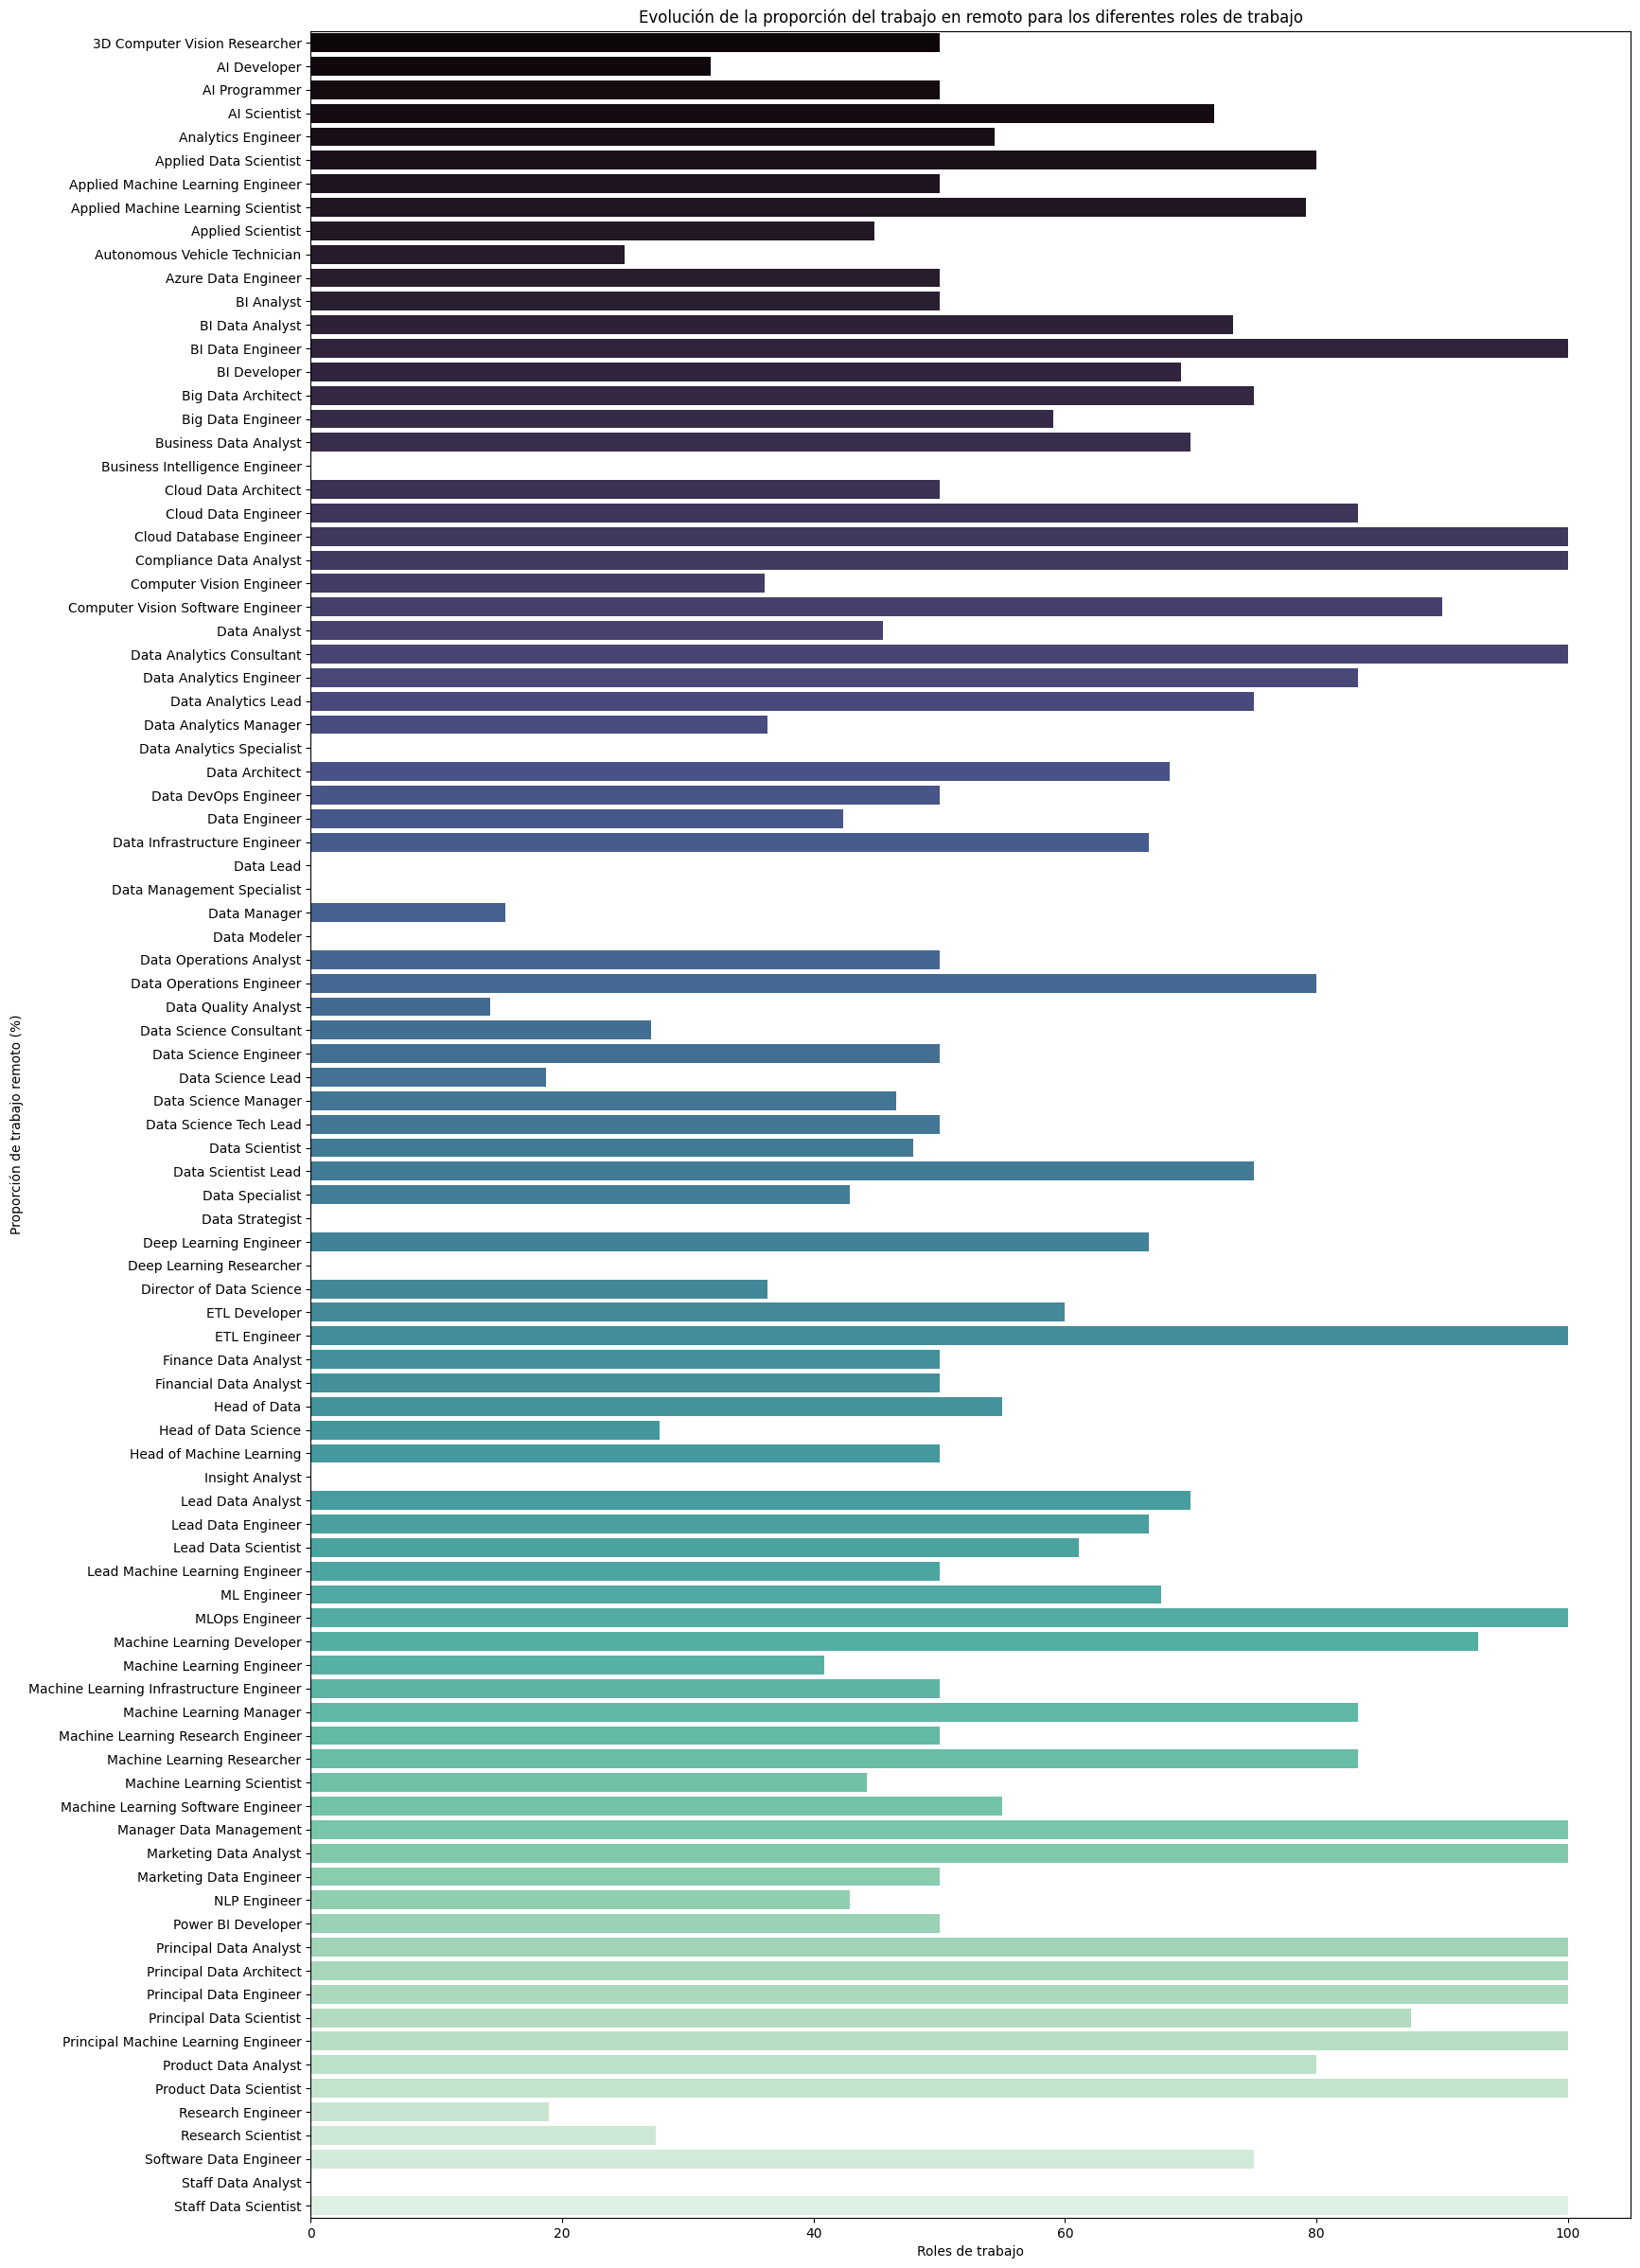

In [157]:
proporcion_remoto_trabajo = df.groupby('job_title')['remote_ratio'].mean().reset_index()
plt.figure(figsize=(18, 30))
sns.barplot(data = proporcion_remoto_trabajo, x = 'remote_ratio', y= 'job_title', palette= 'mako')
plt.title("Evolución de la proporción del trabajo en remoto para los diferentes roles de trabajo")
plt.ylabel("Proporción de trabajo remoto (%)")
plt.xlabel("Roles de trabajo")
plt.show()

#### ¿Existe una relación entre el tamaño de la empresa y el salario?

In [148]:
df["company_size_num"] = df["company_size"].map({"S":1, "M":2, "L":3 } )
corr = df[["salary_in_usd", "company_size_num"]].corr()
print(corr) #la correlación cercana a 0.000372 indica que, linealmente, no hay una relación fuerte entre estas dos variables. 

                  salary_in_usd  company_size_num
salary_in_usd          1.000000          0.000372
company_size_num       0.000372          1.000000


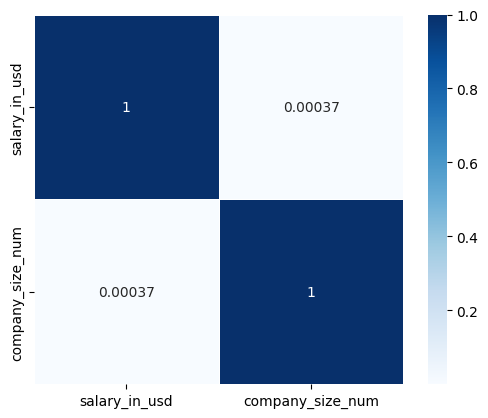

In [162]:
sns.heatmap(corr, annot=True, linewidths=.5, square=True, cmap='Blues'); 
#Aparentemente no existe una correlación entre el tamaño de la empresa y el sueldo medio

#### ¿Cuál es el país con más trabajadores remotos?

In [42]:
remoto = df[df['remote_ratio']==100]
remoto['employee_residence'].value_counts().head(1)

employee_residence
US    1302
Name: count, dtype: int64

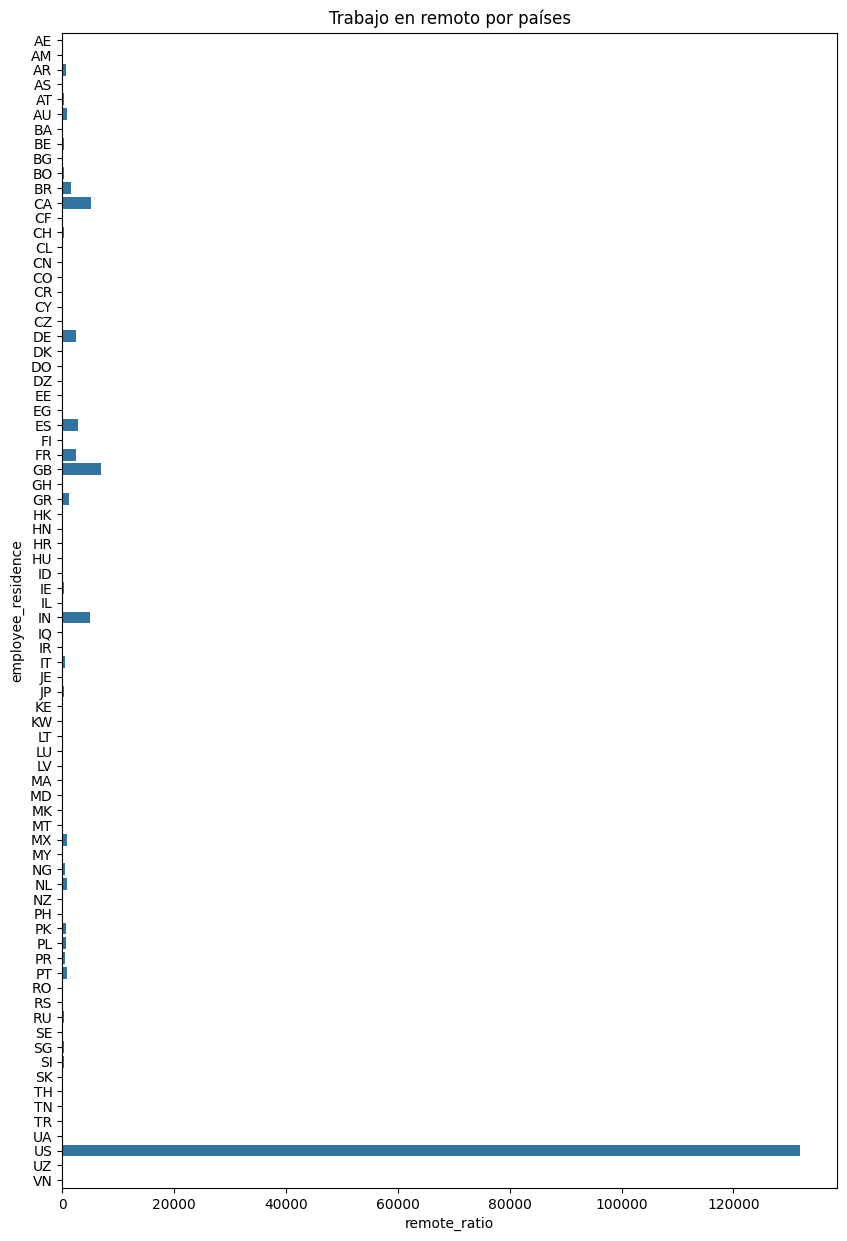

In [57]:
remoto_pais = df.groupby('employee_residence')['remote_ratio'].sum().reset_index()
plt.figure(figsize=(10,15))
fig3=sns.barplot(data=remoto_pais, x='remote_ratio', y='employee_residence')
fig3.set_title('Trabajo en remoto por países')
plt.show()

#### ¿Cómo ha cambiado la proporción de trabajo remoto con el paso del tiempo?

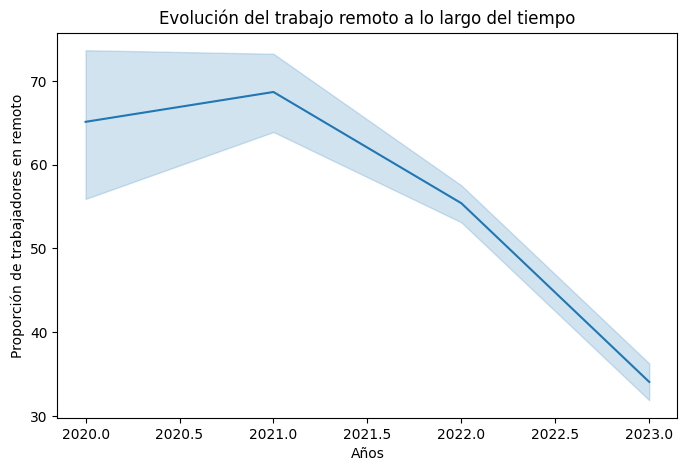

In [78]:
plt.figure(figsize=(8,5))  #Tendencia a disminuir con los años
fig4 = sns.lineplot(data=df, y='remote_ratio', x='work_year')
fig4.set_title('Evolución del trabajo remoto a lo largo del tiempo')
fig4.set_xlabel('Años')
fig4.set_ylabel('Proporción de trabajadores en remoto')
plt.show()

#### ¿Cuál es el país con los salarios promedio más altos en USD?

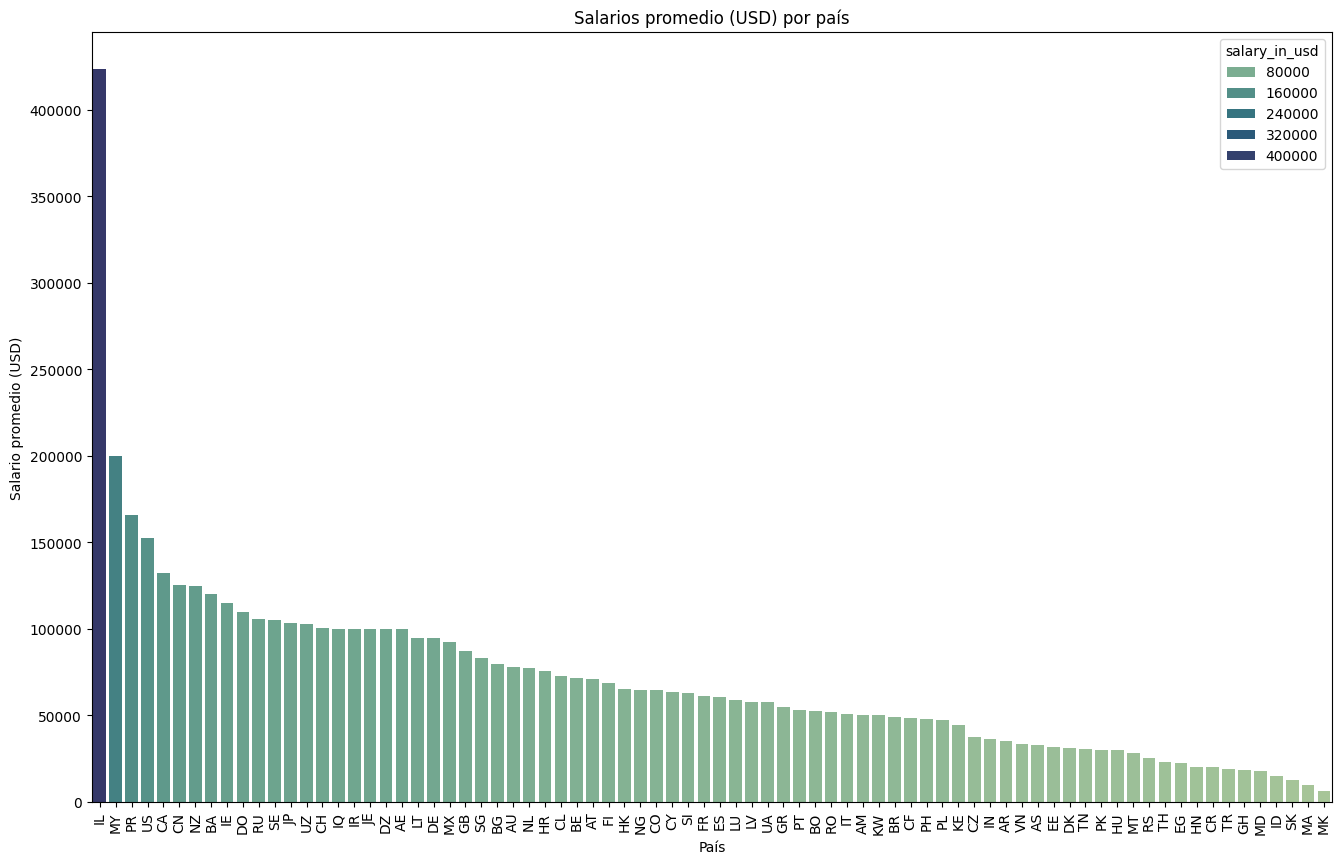

In [112]:
salario_pais = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,10))
sns.barplot(data=salario_pais, y='salary_in_usd', x='employee_residence', palette='crest', hue='salary_in_usd').set_title('Salarios promedio (USD) por país')
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Salario promedio (USD)')
plt.show()

##### ¿Cómo se distribuyen los roles de trabajo en las diferentes categorías de experiencia?

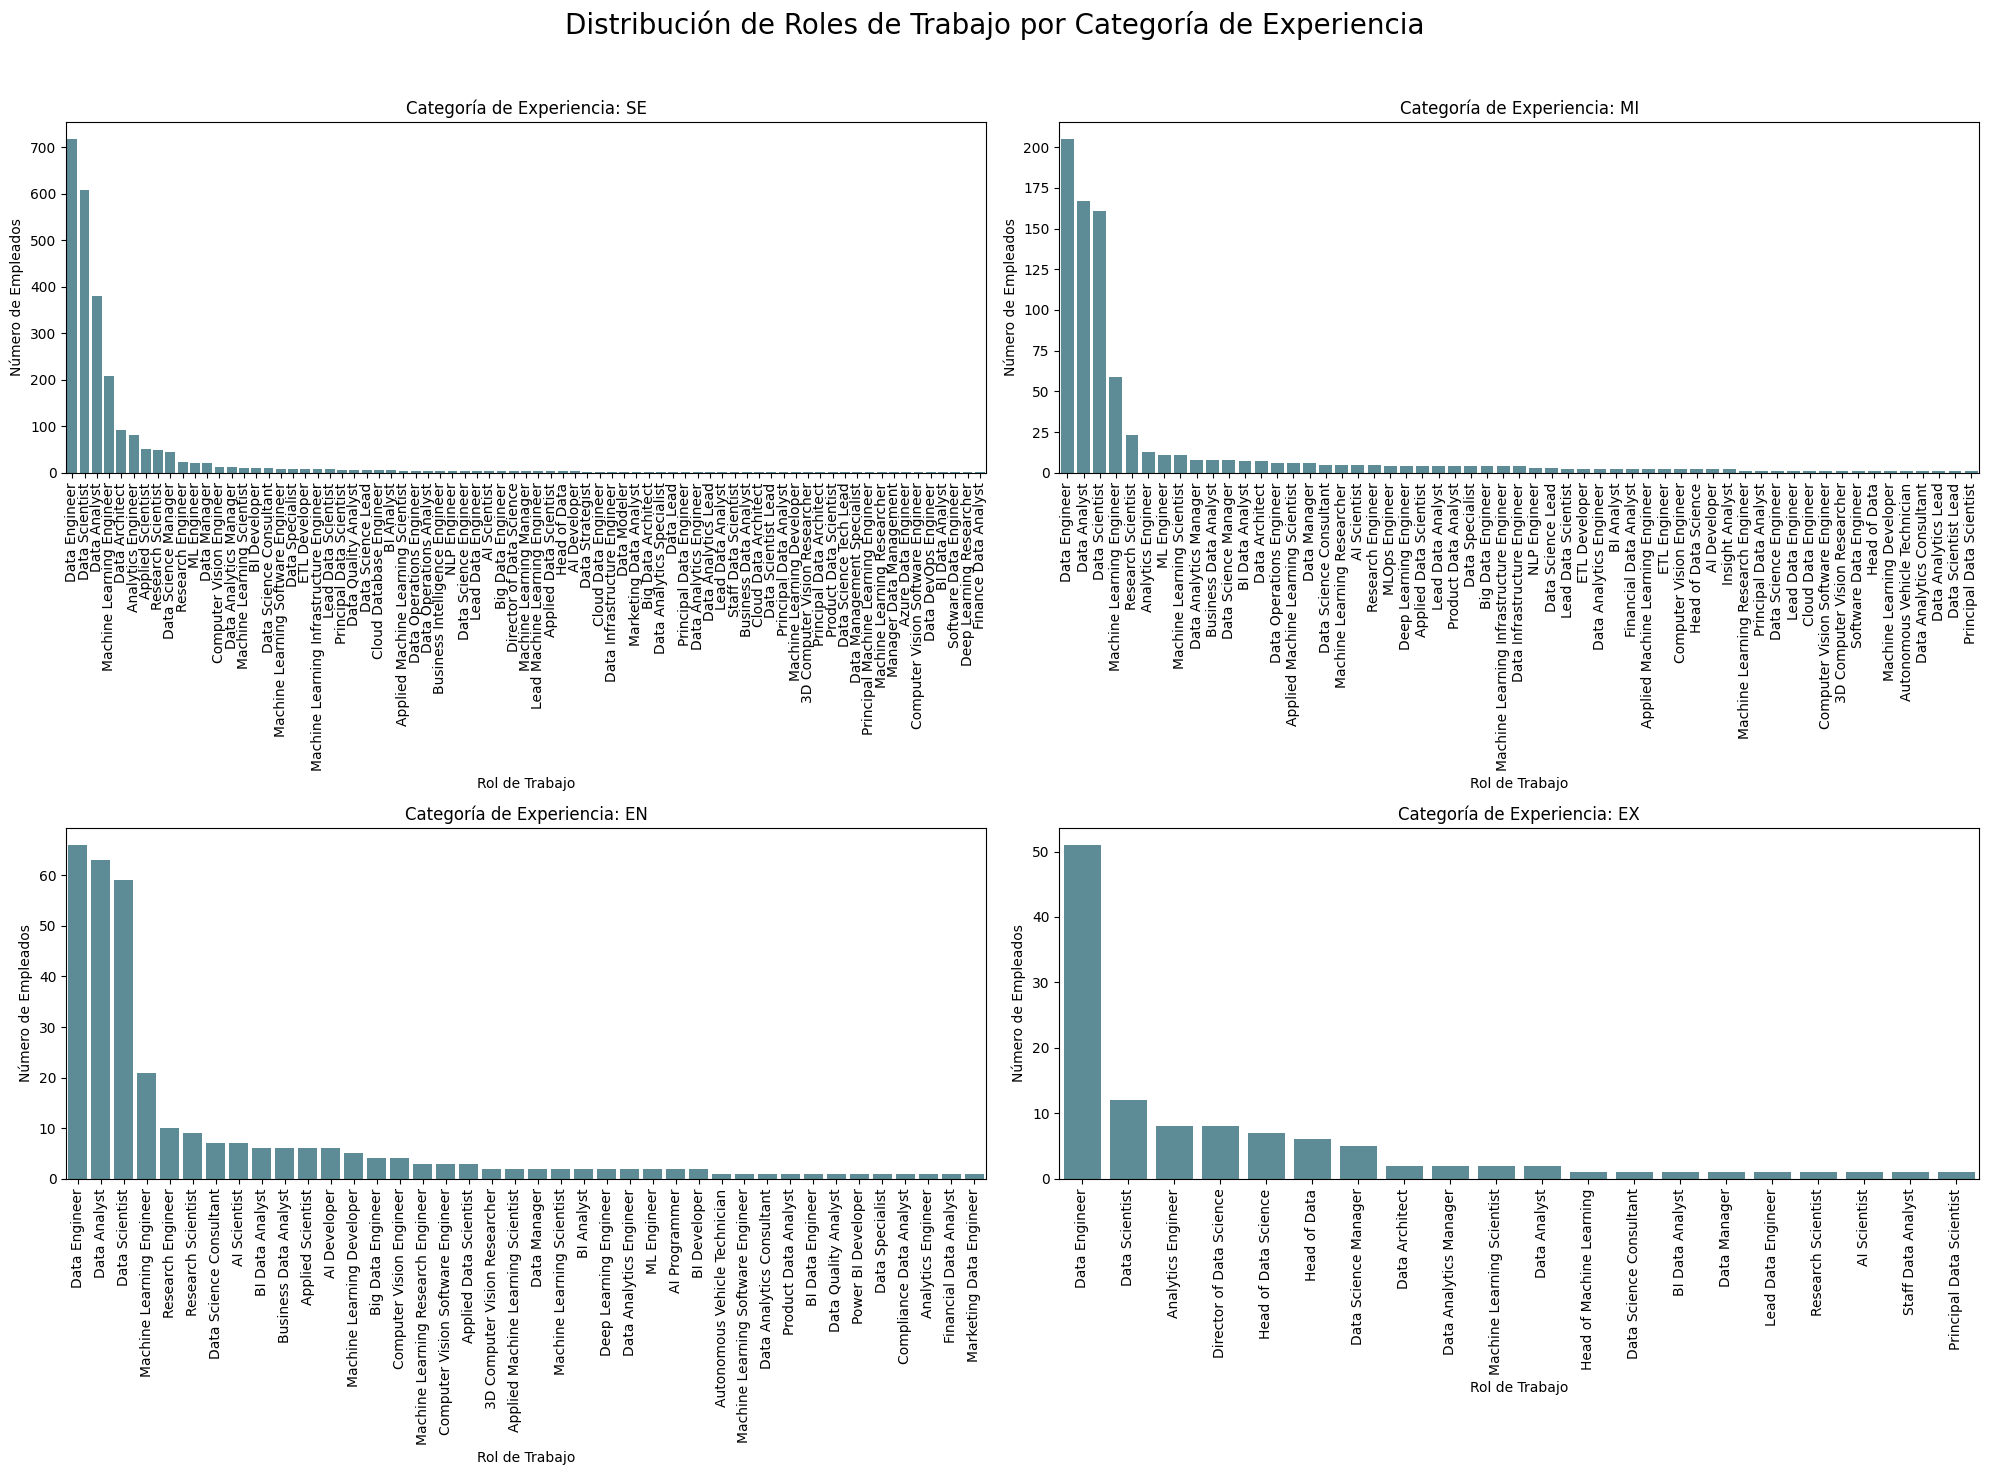

In [7]:
experience_levels = df['experience_level'].unique()

# Configuración de la figura
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
fig.suptitle('Distribución de Roles de Trabajo por Categoría de Experiencia', fontsize=20)

# Bucle for para generar las gráficas
for i, level in enumerate(experience_levels):
    subset_df = df[df['experience_level'] == level]
    ax = axes[i // 2, i % 2]  # Divide el gráfico en una cuadrícula de 2x2
    sns.countplot(data=subset_df, x='job_title', ax=ax, color='#5391a0', order=subset_df['job_title'].value_counts().index)
    ax.set_title(f'Categoría de Experiencia: {level}')
    ax.set_xlabel('Rol de Trabajo')
    ax.set_ylabel('Número de Empleados')
    ax.tick_params(axis='x', rotation=90)

# Ajustes de diseño de la figura
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta el diseño para evitar superposiciones
plt.show()

In [70]:
etiqueta={'count':'Cantidad','parent':'Nivel de experiencia'}
fig = px.treemap(df, path=['experience_level', 'job_title'],
                 title='Distribución de roles de trabajos por experiencia laboral', color='salary_in_usd', color_continuous_scale='tealrose', labels= etiquetas)
fig.update_layout(
    autosize=False,
    width=1300,
    height=1000)



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'branchvalues': 'total',
              'customdata': array([[ 35000.        ],
                                   [  5409.        ],
                                   [ 10000.        ],
                                   [130884.5       ],
                                   [137510.        ],
                                   [147666.66666667],
                                   [ 55000.        ],
                                   [ 52781.28571429],
                                   [200000.        ],
                                   [117726.2       ],
                                   [201278.        ],
                                   [130000.        ],
                                   [175125.        ],
                                   [102480.23076923],
                                   [158404.02469136],
                                   [ 66679.        ],
                                   [ 77977.        ],
                                   [208439.33333333],
                                   [ 99875.5       ],
                                   [ 36696.        ],
                                   [135820.5       ],
                                   [106279.75      ],
                                   [167356.66666667],
                                   [192907.69230769],
                                   [  7000.        ],
                                   [ 45555.        ],
                                   [100000.        ],
                                   [ 44000.        ],
                                   [ 63000.        ],
                                   [146000.        ],
                                   [ 32755.        ],
                                   [150000.        ],
                                   [ 69739.28571429],
                                   [ 71897.        ],
                                   [ 60000.        ],
                                   [130000.        ],
                                   [129818.18181818],
                                   [125802.5       ],
                                   [ 55527.5       ],
                                   [ 37225.        ],
                                   [128127.33333333],
                                   [ 48573.33333333],
                                   [ 74942.625     ],
                                   [100000.        ],
                                   [174150.        ],
                                   [250000.        ],
                                   [ 89294.        ],
                                   [ 86304.        ],
                                   [155000.        ],
                                   [ 30000.        ],
                                   [ 95902.25      ],
                                   [ 37367.        ],
                                   [177108.91666667],
                                   [ 79691.        ],
                                   [ 95746.        ],
                                   [ 53654.        ],
                                   [ 59802.74603175],
                                   [120000.        ],
                                   [101516.62275449],
                                   [119930.21578947],
                                   [ 50000.        ],
                                   [113000.        ],
                                   [ 16500.        ],
                                   [122500.        ],
                                   [ 64598.5       ],
                                   [ 17509.        ],
                                   [405000.        ],
                                   [147500.        ],
                                   [147500.        ],
                                   [137195.        ],
                                   [ 95000.        ],
                                   [167500.        ],
                                   [149714.28571429],
          

Conclusiones: el nivel de experiencia con más roles de trabajo es el Senior. Cuanta más experiencia más específico el rol?

#### ¿Cómo varía el salario promedio entre los diferentes tipos de empleo, fulltime, partime ect?

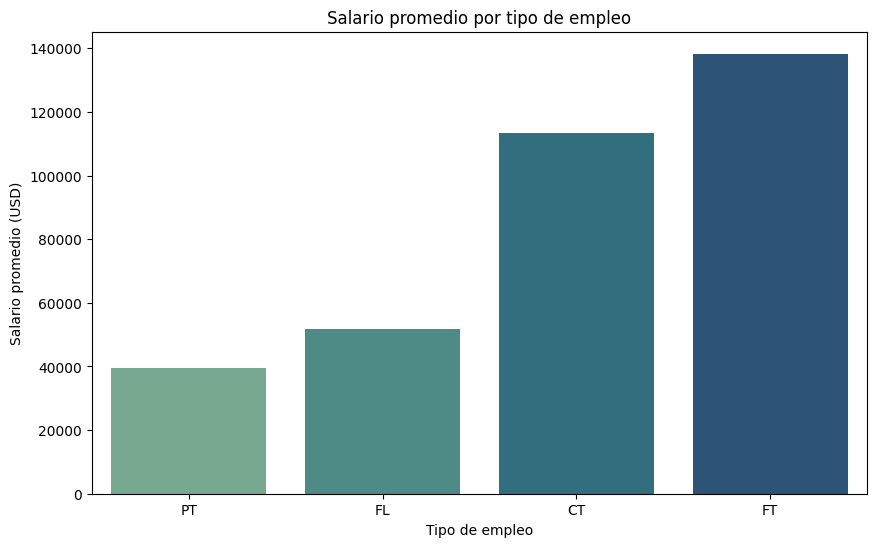

In [96]:
salario_modalidad = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=salario_modalidad.sort_values('salary_in_usd'), x ='employment_type', y = 'salary_in_usd', palette = 'crest', hue='employment_type').set_title('Salario promedio por tipo de empleo')
plt.xlabel('Tipo de empleo')
plt.ylabel('Salario promedio (USD)');


Como es de esperar el fulltime tiene un salario promedio más alto 


#### Crear un top10 con los empleos mas demandados:


In [110]:
top_empleos = df['job_title'].value_counts().head(10).reset_index()
top_empleos


,job_title,count
0,Data Engineer,1040
1,Data Scientist,840
2,Data Analyst,612
3,Machine Learning Engineer,289
4,Analytics Engineer,103
5,Data Architect,101
6,Research Scientist,82
7,Data Science Manager,58
8,Applied Scientist,58
9,Research Engineer,37


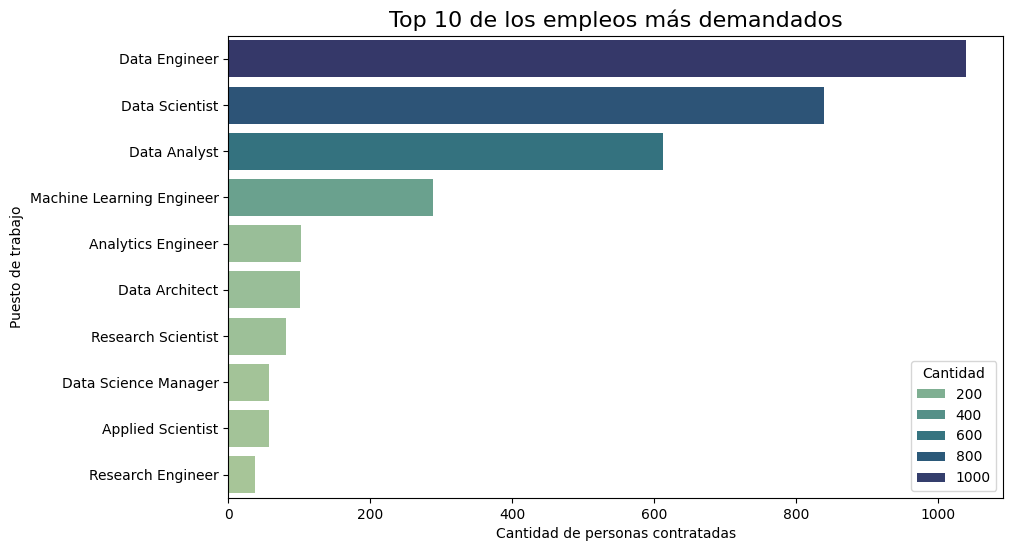

In [120]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_empleos, x='count',y='job_title', palette = 'crest', hue = 'count')
plt.title('Top 10 de los empleos más demandados', fontsize =16)
plt.xlabel('Cantidad de personas contratadas')
plt.ylabel('Puesto de trabajo')
plt.legend(title='Cantidad');



#### Crear un top10 con los empleos mas cotizados:


In [136]:
cotizados = df.groupby('job_title')['salary_in_usd'].mean().reset_index()
top_cotizados = cotizados.sort_values(by='salary_in_usd', ascending = False).head(10)
top_cotizados

,job_title,salary_in_usd
46,Data Science Tech Lead,375000.000000
19,Cloud Data Architect,250000.000000
35,Data Lead,212500.000000
28,Data Analytics Lead,211254.500000
84,Principal Data Scientist,198171.125000
53,Director of Data Science,195140.727273
83,Principal Data Engineer,192500.000000
75,Machine Learning Software Engineer,192420.000000
45,Data Science Manager,191278.775862
8,Applied Scientist,190264.482759


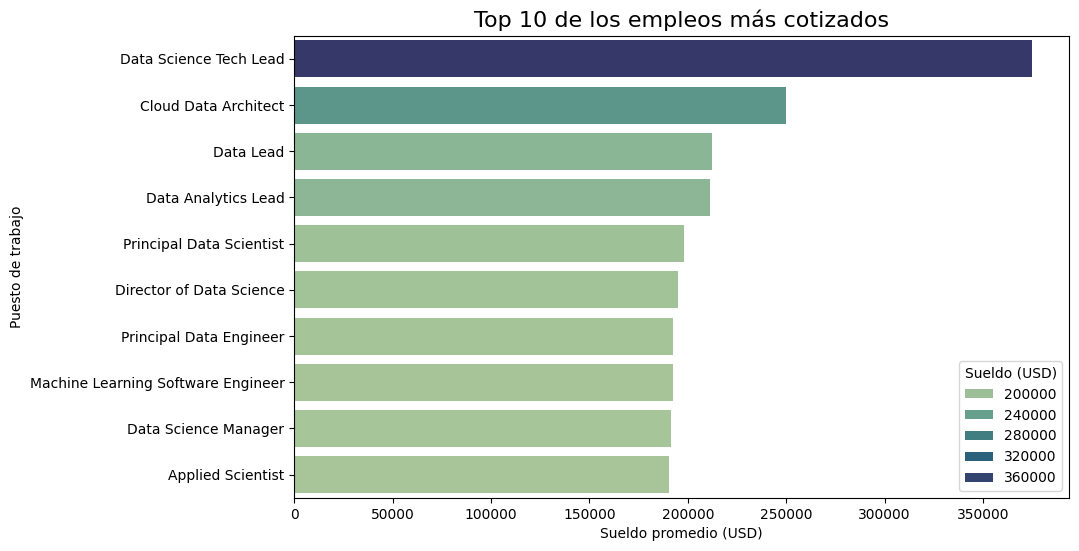

In [145]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_cotizados, x='salary_in_usd',y='job_title', palette = 'crest', hue = 'salary_in_usd')
plt.title('Top 10 de los empleos más cotizados', fontsize =16)
plt.xlabel('Sueldo promedio (USD)')
plt.ylabel('Puesto de trabajo')
plt.legend(title='Sueldo (USD)');

Principalmente trabajos de: responsable, encargado, líder, director.


#### Crear un top10 con empleos donde podemos trabajar remoto:


In [149]:
top_remoto = df[df['remote_ratio']==100]['job_title'].value_counts().head(10).reset_index()
top_remoto

,job_title,count
0,Data Engineer,432
1,Data Scientist,380
2,Data Analyst,270
3,Machine Learning Engineer,109
4,Data Architect,69
5,Analytics Engineer,55
6,Data Science Manager,26
7,Applied Scientist,26
8,ML Engineer,22
9,Research Scientist,17


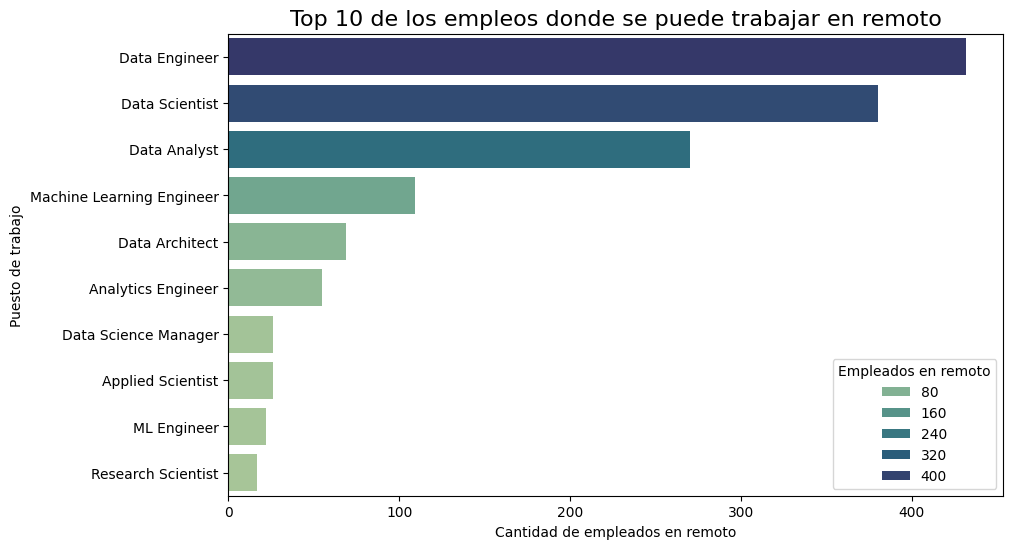

In [148]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_remoto, x='count',y='job_title', palette = 'crest', hue = 'count')
plt.title('Top 10 de los empleos donde se puede trabajar en remoto', fontsize =16)
plt.xlabel('Cantidad de empleados en remoto')
plt.ylabel('Puesto de trabajo')
plt.legend(title='Empleados en remoto');